In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


# Data loading and splitting

In [3]:
# Load the dataframe
df = pd.read_json('file.json', lines=True)

# replace the space with _
df.columns=df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check the percentage of missing value
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})
print(missing_data)


# drop the the columns
df.drop(['waist', 'bust', 'user_name','review_text','review_summary','shoe_size','shoe_width'], axis=1, inplace=True)



#code starts here

# store independent variable
X = df.drop(['fit'],axis=1)

# store dependent variable
y = df['fit']

# spliting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.33,random_state=6)


                total_missing  perc_missing
bra_size                 6018      7.268994
bust                    70936     85.681846
category                    0      0.000000
cup_size                 6255      7.555260
fit                         0      0.000000
height                   1107      1.337118
hips                    26726     32.281677
item_id                     0      0.000000
length                     35      0.042276
quality                    68      0.082136
review_summary           6725      8.122962
review_text              6725      8.122962
shoe_size               54875     66.282160
shoe_width              64183     77.525063
size                        0      0.000000
user_id                     0      0.000000
user_name                   0      0.000000
waist                   79908     96.518903


# Category vs fit feedback

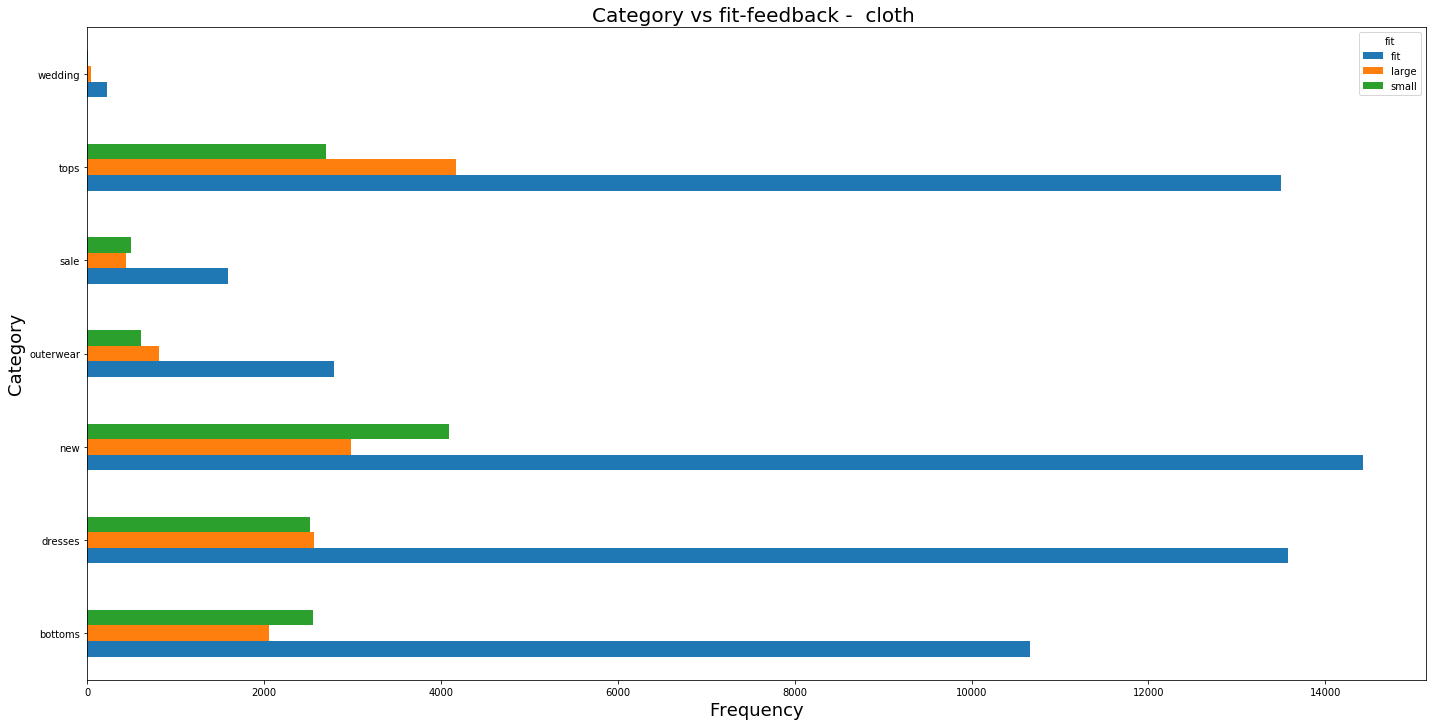

In [4]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  cloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)


# Code starts here
# plot the bar chart
g_by_category = df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
plot_barh(cat_fit, 'fit')
# Code ends here

# Category vs Length

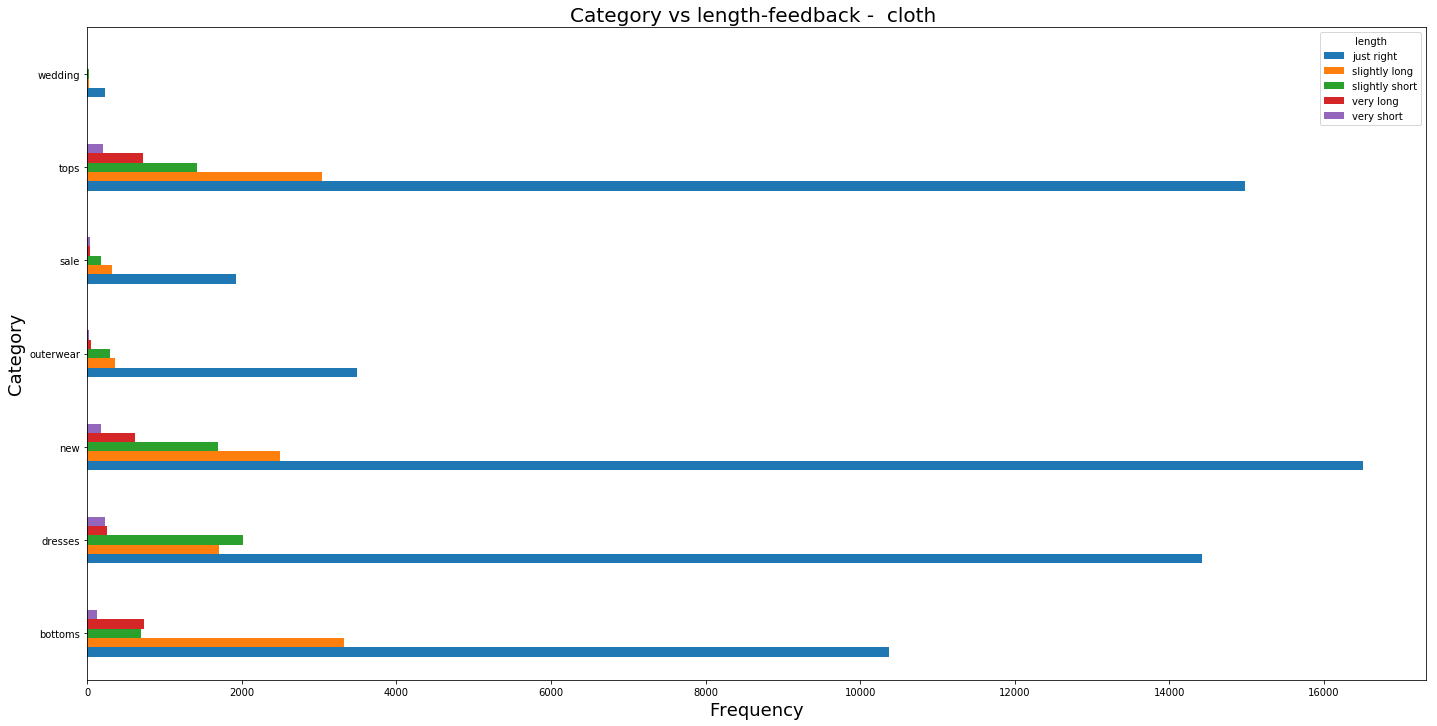

In [5]:
# plot the bar chart for category vs length
cat_len = g_by_category['length'].value_counts()
cat_len = cat_len.unstack()
plot_barh(cat_len, 'length')

# Observation:

Best length-fitting ('just right') belongs to tops, new, dresses and bottoms! (Also due to predominance of these categories in our total transactions- they make up almost 92% of our transactions!)
All transactions share a similar order of reasons for return (in the order of importance), which is kind of intuitive as well:

1. slightly long
2. slightly short
3. very long
4. very short

# Convert feet to centimeters

In [6]:
# function to to convert feet to inches

def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)

# apply on train data    
X_train.height = X_train.height.apply(get_cms)

# apply on testing set
X_test.height = X_test.height.apply(get_cms)

In [7]:
X_train.head()

,bra_size,category,cup_size,height,hips,item_id,length,quality,size,user_id
8540,32.0,dresses,b,172.72,38.0,160625,slightly long,5.0,3,276443
30834,34.0,new,b,165.10,35.0,407044,just right,2.0,8,980141
6095,36.0,new,d,170.18,45.0,152513,just right,2.0,15,682176
14462,32.0,dresses,d,152.40,37.0,171740,just right,4.0,7,459825
37896,42.0,new,c,165.10,NaN,416942,just right,4.0,26,151852


In [8]:
X_test.head()

,bra_size,category,cup_size,height,hips,item_id,length,quality,size,user_id
36962,34.0,new,c,167.64,35.0,416738,just right,4.0,4,456934
24517,36.0,dresses,b,162.56,34.0,391519,just right,3.0,8,975803
46688,44.0,tops,b,182.88,53.0,503595,just right,2.0,32,180164
14851,36.0,dresses,b,175.26,NaN,175771,just right,4.0,1,807174
8526,34.0,dresses,dd/e,157.48,NaN,160625,just right,5.0,13,974391


# Missing value imputation

In [9]:
print(X_train.isnull().sum())

# drop missing values
X_train.dropna(subset=['height','length','quality'],inplace=True)
X_test.dropna(subset=['height','length','quality'],inplace=True)

y_train=y_train[X_train.index]
y_test=y_test[X_test.index]

# fill missing values with mean
X_train['bra_size'].fillna((X_train['bra_size'].mean()), inplace=True)
X_test['bra_size'].fillna((X_test['bra_size'].mean()), inplace=True)

X_train['hips'].fillna((X_train['hips'].mean()), inplace=True)
X_test['hips'].fillna((X_test['hips'].mean()), inplace=True)

# fill missing value with mode
mode_1 = X_train['cup_size'].mode()[0]
mode_2 = X_test['cup_size'].mode()[0]
X_train['cup_size']=X_train['cup_size'].replace(np.nan,mode_1)
X_test['cup_size']=X_test['cup_size'].replace(np.nan,mode_2)

print(X_train.isnull().sum())

bra_size     3986
category        0
cup_size     4150
height        728
hips        17878
item_id         0
length         26
quality        44
size            0
user_id         0
dtype: int64
bra_size    0
category    0
cup_size    0
height      0
hips        0
item_id     0
length      0
quality     0
size        0
user_id     0
dtype: int64


# One hot encoding

In [10]:
# one hot encoding
X_train=pd.get_dummies(data=X_train,columns=["category", "cup_size","length"],prefix=["category", "cup_size","length"])
X_test=pd.get_dummies(data=X_test,columns=["category", "cup_size","length"],prefix=["category", "cup_size","length"])

In [11]:
X_train.head()

,bra_size,height,hips,item_id,quality,size,user_id,category_bottoms,category_dresses,category_new,...,cup_size_dddd/g,cup_size_h,cup_size_i,cup_size_j,cup_size_k,length_just right,length_slightly long,length_slightly short,length_very long,length_very short
8540,32.0,172.72,38.000000,160625,5.0,3,276443,0,1,0,...,0,0,0,0,0,0,1,0,0,0
30834,34.0,165.10,35.000000,407044,2.0,8,980141,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6095,36.0,170.18,45.000000,152513,2.0,15,682176,0,0,1,...,0,0,0,0,0,1,0,0,0,0
14462,32.0,152.40,37.000000,171740,4.0,7,459825,0,1,0,...,0,0,0,0,0,1,0,0,0,0
37896,42.0,165.10,40.364358,416942,4.0,26,151852,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [12]:
X_test.head()

,bra_size,height,hips,item_id,quality,size,user_id,category_bottoms,category_dresses,category_new,...,cup_size_dddd/g,cup_size_h,cup_size_i,cup_size_j,cup_size_k,length_just right,length_slightly long,length_slightly short,length_very long,length_very short
36962,34.0,167.64,35.000000,416738,4.0,4,456934,0,0,1,...,0,0,0,0,0,1,0,0,0,0
24517,36.0,162.56,34.000000,391519,3.0,8,975803,0,1,0,...,0,0,0,0,0,1,0,0,0,0
46688,44.0,182.88,53.000000,503595,2.0,32,180164,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14851,36.0,175.26,40.333333,175771,4.0,1,807174,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8526,34.0,157.48,40.333333,160625,5.0,13,974391,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Is my prediction right?

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score




# code starts here 

# Instantiate logistic regression
model = DecisionTreeClassifier(random_state = 6)

# fit the model
model.fit(X_train,y_train)

# predict the result
y_pred =model.predict(X_test)

# calculate the f1 score
score = accuracy_score(y_test, y_pred)
print("Accuracy Score: ",score)

# calculate the precision score
precision = precision_score(y_test, y_pred, average=None)
print("Precision:",precision)


Accuracy Score:  0.5751123992122766
Precision: [0.72714062 0.28549002 0.26194651]


# Model building using GridSearchCv

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# parameters for grid search
parameters = {'max_depth':[5,10],'criterion':['gini','entropy'],'min_samples_leaf':[0.5,1]}

# Code starts here

# instantiate Decision tree classifier model
model=DecisionTreeClassifier(random_state=6)

# grid search on logistic regression
grid = GridSearchCV(estimator=model, param_grid=parameters)
grid.fit(X_train, y_train)
# make predictions 
y_pred = grid.predict(X_test)

# accuracy check
accuracy= grid.score(X_test,y_test)
print("Accuracy:",accuracy)

Accuracy: 0.6955003158324973
